In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("waterQuality1.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [4]:
data.head

<bound method NDFrame.head of       aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mer

In [5]:
data.describe

<bound method NDFrame.describe of       aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites 

In [6]:
data.loc[data['ammonia'] == '#NUM!', 'ammonia']= data['ammonia'].mode()[0]
data['ammonia']= data['ammonia'].astype(float)

In [7]:
data.loc[data['is_safe'] == '#NUM!', 'is_safe']= data['is_safe'].mode()[0]
data['is_safe']= data['is_safe'].astype(int)

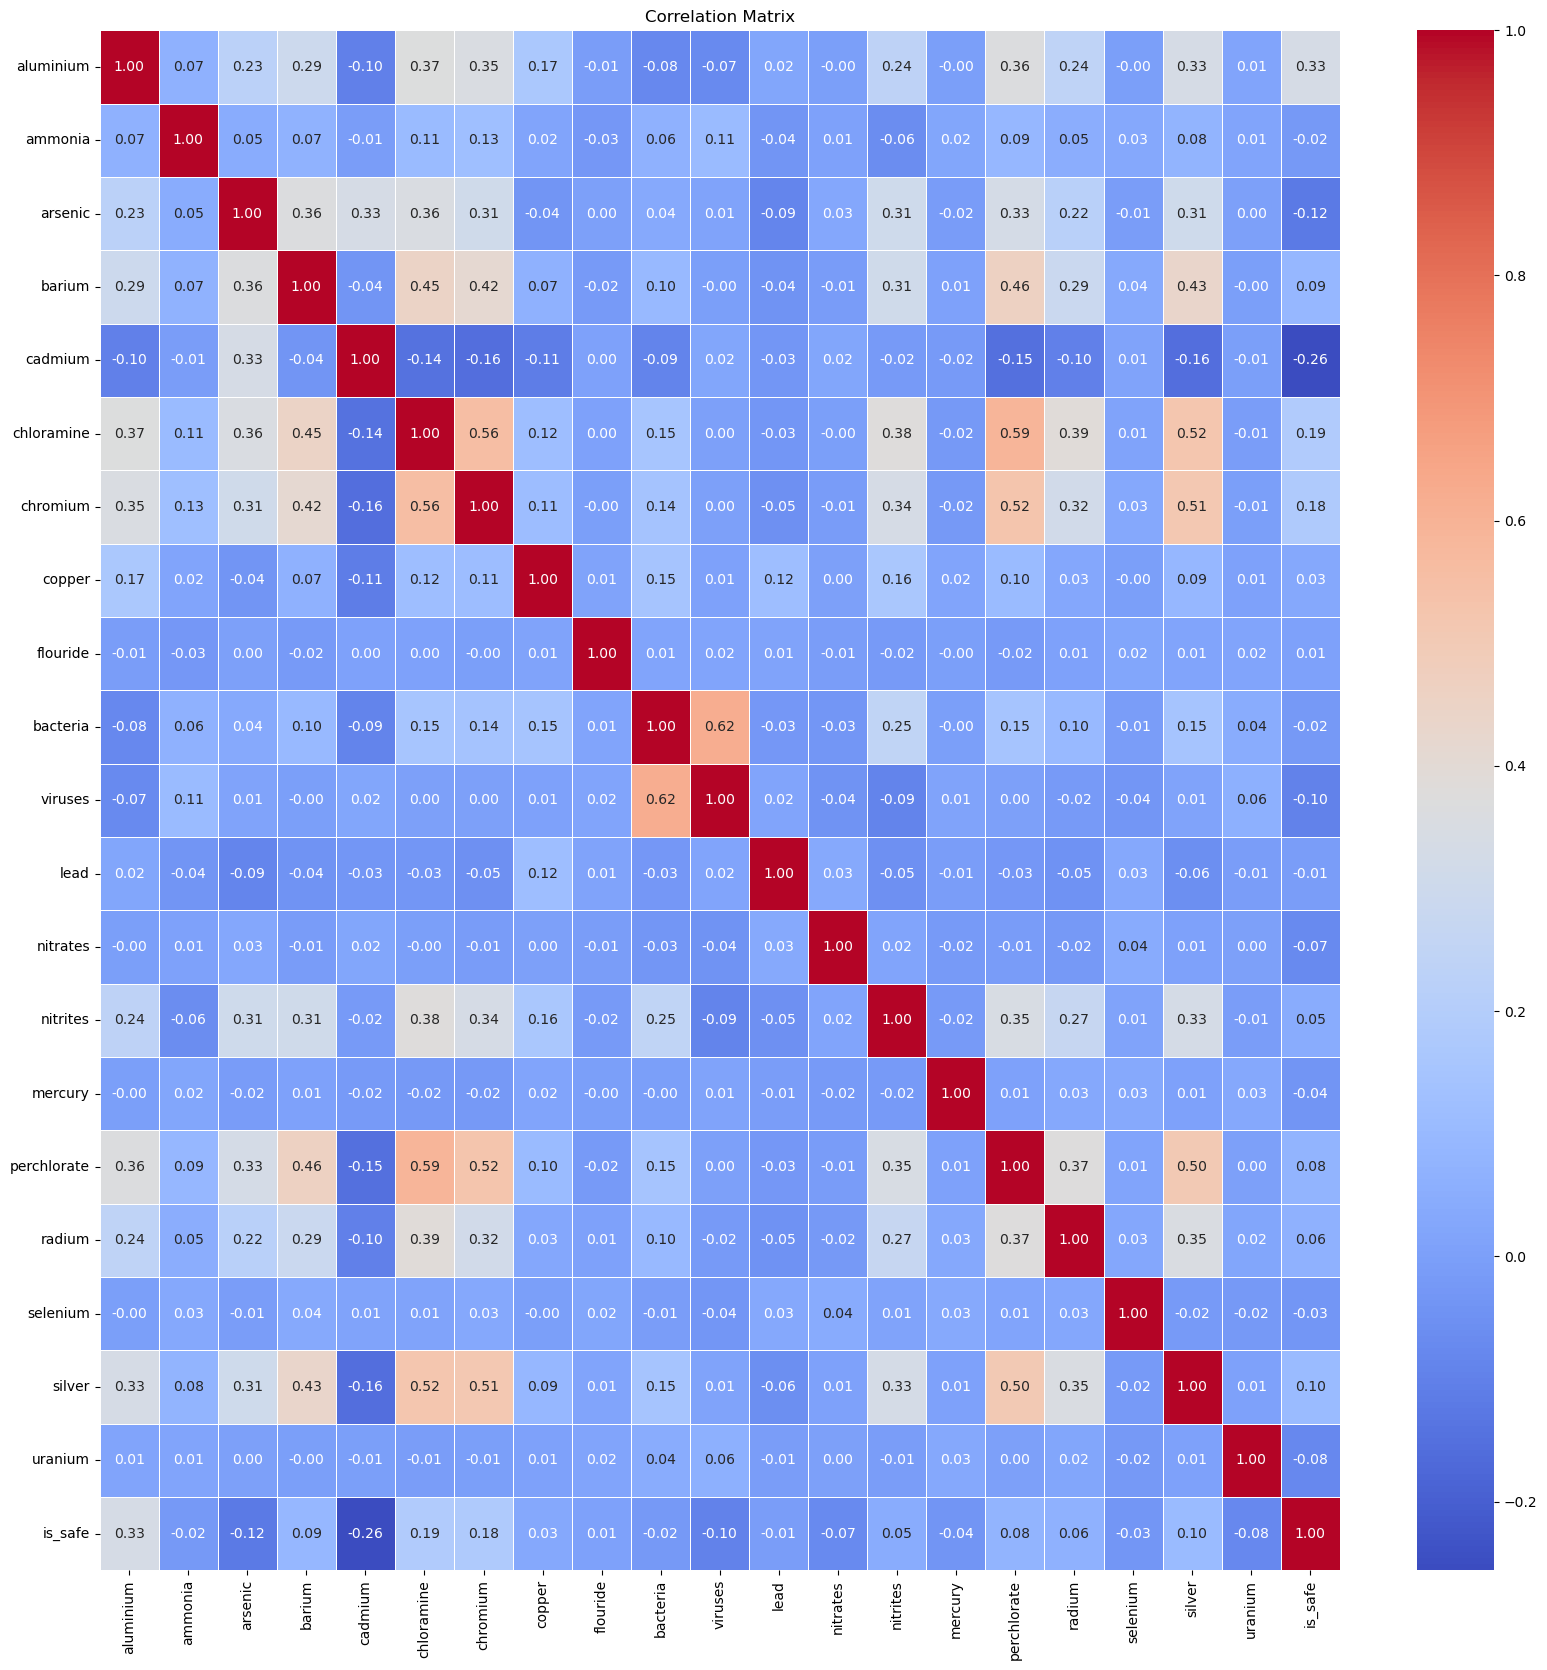

In [8]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
X=data.drop("is_safe",axis=1)
y=data['is_safe']

In [10]:
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.20, random_state=3)

In [11]:
scale = StandardScaler()
x_train = scale.fit_transform(X_train) #fit transform x train
x_test = scale.transform(X_test)

In [12]:
x_train

array([[-0.36283608, -0.35015026, -0.59572587, ..., -0.34319879,
        -0.74692417,  0.93696265],
       [ 2.18949685,  0.70156146,  1.97989245, ..., -1.03960884,
         2.24718168,  0.93696265],
       [ 0.77418451,  0.16499685, -0.51647607, ...,  1.39782633,
         2.03829058,  0.19899428],
       ...,
       [-0.51390875, -0.97802103,  2.21764183, ..., -1.03960884,
         0.22790099,  0.19899428],
       [-0.3389825 ,  0.2743388 ,  0.59302105, ...,  1.0496213 ,
        -0.74692417,  0.19899428],
       [-0.50595756,  1.48273641, -0.55610097, ...,  1.39782633,
        -0.60766343, -0.53897408]])

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6399, 20), (6399,), (1600, 20), (1600,))

In [14]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred1=model1.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
y_pred1_train=model1.predict(x_train)
accuracy1_train=accuracy_score(y_pred1_train,y_train)
accuracy1_train

0.9032661353336459

In [17]:
accuracy1=accuracy_score(y_pred1,y_test)
accuracy1

0.923125

In [18]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))

Confusion Matrix:
[[1417   28]
 [  95   60]]


In [19]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred2=model2.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
y_pred2_train=model2.predict(x_train)
accuracy2_train=accuracy_score(y_pred2_train,y_train)
accuracy2_train

1.0

In [22]:
accuracy2=accuracy_score(y_pred2,y_test)
accuracy2

0.951875

In [23]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

Confusion Matrix:
[[1405   40]
 [  37  118]]


In [24]:
model3 = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=3)
model3.fit(x_train, y_train)

SVC(random_state=3)

In [25]:
y_pred3 = model3.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_pred3_train=model3.predict(x_train)
accuracy3_train=accuracy_score(y_pred3_train,y_train)
accuracy3_train

0.953117674636662

In [27]:
accuracy3=accuracy_score(y_pred3,y_test)
accuracy3

0.954375

In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

Confusion Matrix:
[[1429   16]
 [  57   98]]


In [29]:
voting_clf_hard = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='hard')
voting_clf_hard.fit(x_train, y_train)
y_pred_hard = voting_clf_hard.predict(x_test)

In [30]:
scores = cross_val_score(voting_clf_hard, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-Validation Accuracy: 0.94 (+/- 0.01)


In [31]:
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f"Hard Voting Classifier Accuracy: {accuracy_hard:.2f}")

Hard Voting Classifier Accuracy: 0.96


aluminium - dangerous if greater than 2.8
ammonia - dangerous if greater than 32.5
arsenic - dangerous if greater than 0.01
barium - dangerous if greater than 2
cadmium - dangerous if greater than 0.005
chloramine - dangerous if greater than 4
chromium - dangerous if greater than 0.1
copper - dangerous if greater than 1.3
flouride - dangerous if greater than 1.5
bacteria - dangerous if greater than 0
viruses - dangerous if greater than 0
lead - dangerous if greater than 0.015
nitrates - dangerous if greater than 10
nitrites - dangerous if greater than 1
mercury - dangerous if greater than 0.002
perchlorate - dangerous if greater than 56
radium - dangerous if greater than 5
selenium - dangerous if greater than 0.5
silver - dangerous if greater than 0.1
uranium - dangerous if greater than 0.3
is_safe - safe if 1 & unsafe if 0

In [32]:
input_data = pd.DataFrame({
    'aluminium': [1.65],
    'ammonia': [9.08],
    'arsenic': [0.04],
    'barium': [2.85],
    'cadmium': [0.007],
    'chloramine': [0.35],
    'chromium': [0.83],
    'copper': [0.17],
    'flouride': [0.05],
    'bacteria': [0.20],
    'viruses': [0.10],
    'lead': [0.054],
    'nitrates': [16.08],
    'nitrites': [1.13],
    'mercury': [0.007],
    'perchlorate': [37.75],
    'radium': [6.78],
    'selenium': [0.08],
    'silver': [0.34],
    'uranium': [0.02],
})

# Ensure input data is numeric
input_data = input_data.apply(pd.to_numeric)
input_data_scaled = scale.transform(input_data)  # Scale input data

# Predict using the Voting Classifier
predictions = voting_clf_hard.predict(input_data_scaled)

# Output the predictions
print("Predictions:",predictions)

Predictions: [0]


In [33]:
input_data = pd.DataFrame({
    'aluminium': [1.65],
    'ammonia': [9.08],
    'arsenic': [0.00],
    'barium': [1.85],
    'cadmium': [0.002],
    'chloramine': [0.35],
    'chromium': [0.03],
    'copper': [0.17],
    'flouride': [0.05],
    'bacteria': [0.00],
    'viruses': [0.00],
    'lead': [0.014],
    'nitrates': [6.08],
    'nitrites': [0.73],
    'mercury': [0.001],
    'perchlorate': [37.75],
    'radium': [3.78],
    'selenium': [0.08],
    'silver': [0.08],
    'uranium': [0.02],
})

# Ensure input data is numeric
input_data = input_data.apply(pd.to_numeric)
input_data_scaled = scale.transform(input_data)  # Scale input data

# Predict using the Voting Classifier
predictions = voting_clf_hard.predict(input_data_scaled)

# Output the predictions
print("Predictions:",predictions)

Predictions: [1]
